#  Assignment - 1  :   Housing  Price  Predictor


###   The  problem  that  we  are  going  to  solve  here  is  that  given  a  set  of  features  that  describes  a  house             in  Boston,  our  machine  learning  model  must  predict  the  house  price.   To  train  our  machine  learning          model  with  boston  housing  data,  we  will  be  using  scikit - learn’s  Boston  dataset.

###  In  this  dataset,  each  row  describes  a  Boston  town  or  suburb.  There  are  506  rows  and  13  attributes             (features)  with  a  target  column  (price).

In [1]:
#  Importing Required libraries

import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics

In [5]:
#  Loading Boston Housing Dataset

# Importing the Boston Housing dataset
from sklearn.datasets import load_boston
boston = load_boston()

# Initializing the dataframe
data = pd.DataFrame(boston.data)

#Adding the feature names to the dataframe
data.columns = boston.feature_names

#Adding target variable to dataframe
data['PRICE'] = boston.target               # Median value of owner-occupied homes in $1000s

data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
# Check the shape of dataframe
data.shape

(506, 14)

In [4]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

In [6]:
data.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
PRICE      float64
dtype: object

In [7]:
# Identifying the unique number of values in the dataset
data.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
PRICE      229
dtype: int64

In [8]:
# Check for missing values
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [9]:
# Viewing the data statistics
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [10]:
# Finding out the correlation between the features
corr = data.corr()
corr.shape

(14, 14)

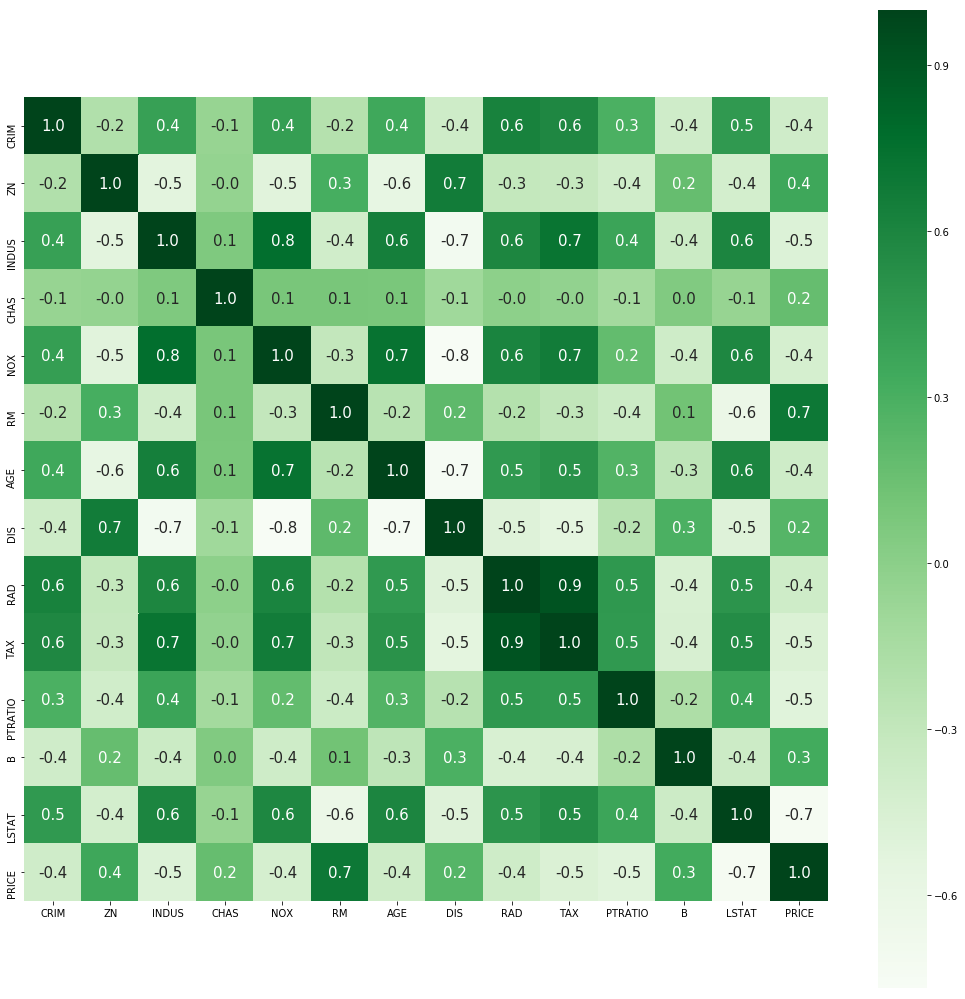

In [11]:
# Plotting the heatmap of correlation between features

plt.figure(figsize=(18,18))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')
plt.show()

In [16]:
# Spliting target variable and independent variables
X = data.drop(['PRICE'], axis = 1)
y = data['PRICE']


In [14]:
from sklearn.preprocessing import StandardScaler 
scaler =StandardScaler()


X_scaled= scaler.fit_transform(X)
X_scaled

array([[-0.41978194,  0.28482986, -1.2879095 , ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40776407, -0.48772236,  0.11573841, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41500016, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.66905833]])

In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = X_scaled

# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
# we do not include categorical values for mulitcollinearity as they do not provide much information as numerical ones do
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = X.columns
vif

,VIF,Features
0,1.792192,CRIM
1,2.298758,ZN
2,3.991596,INDUS
3,1.073995,CHAS
4,4.393720,NOX
5,1.933744,RM
6,3.100826,AGE
7,3.955945,DIS
8,7.484496,RAD
9,9.008554,TAX


In [18]:
# Splitting to training and testing data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, test_size = 0.3, random_state = 4)

##  Training the Linear Regression Model

In [19]:
# Import library for Linear Regression
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression

# Create a Linear regressor
lm = LinearRegression()

# Train the model using the training sets 
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [20]:
# Value of y intercept
lm.intercept_

22.513615270179503

In [23]:
lm.coef_

array([-1.05324731,  1.29725675, -0.06054638,  1.19092939, -1.67113119,
        2.30236223, -0.09695518, -3.26513453,  2.83793161, -2.36839199,
       -1.73732716,  0.85309936, -3.73448955])

In [26]:
# Model prediction on train data
y_pred = lm.predict(X_train)
y_pred

array([24.52247959, 15.19750953, 25.5772058 , 13.93939959, 39.46651291,
       17.45959949, 39.71029914, 16.51748069, 20.19733317, 40.7977555 ,
       33.57245034, 14.50420619, 11.44514488, 23.06563951, 24.39734404,
       25.01096096, 14.36116466, 28.28341539, 25.04931481, 22.42825155,
       21.81588517, 18.85208726, 13.3562124 , 13.65792701, 23.64766018,
       18.06876331, 16.12957228, 41.12414874, 19.43391814, 13.17980896,
       12.88401778, 24.48360463, 24.47855835, 22.1443201 , 23.67882714,
       16.25760322, 18.73996794,  6.65661308, 13.32321855, 15.97333187,
       18.13637439, 20.60454402, 30.72884443,  7.75848746, 13.9207036 ,
       -3.80684116, 30.22337446,  9.24045737, 11.75825936, 25.0286616 ,
       18.84078418, 11.88476435, 28.69569373, 23.23374551, 28.59506092,
       20.30414612, 20.27099511, 25.21759304, 29.00813278, 17.29931495,
       10.61483731, 28.61476335, 28.34559327, 30.02547802, 17.11529423,
       20.57024793, 18.28474144, 13.03972891, 23.08527124, 22.90

In [18]:
# Model Evaluation

print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.7465991966746854
Adjusted R^2: 0.736910342429894
MAE: 3.0898610949711305
MSE: 19.073688703469035
RMSE: 4.367343437774162


##  Different types of  Performance  Measurer  and  Loss  functions

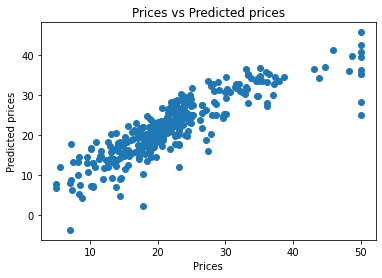

In [19]:
# Visualizing the differences between actual prices and predicted values

plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

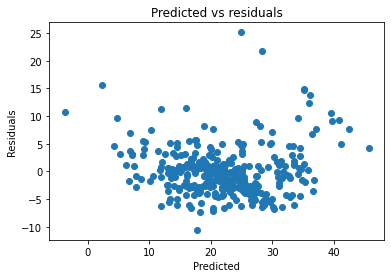

In [20]:
# Checking residuals

plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

####    There  is  no  pattern  visible  in  this  plot  and  values  are  distributed  equally  around  zero.  So  Linearity  assumption  is                       satisfied

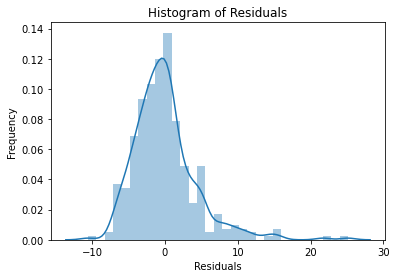

In [21]:
# Checking Normality of errors

sns.distplot(y_train-y_pred)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

In [32]:
# Saving the model to the local file system

filename = 'house_model.pickle'
pickle.dump(lm, open(filename, 'wb'))

In [36]:
u=X_test[0]
u

array([-0.39593474,  0.04877224, -0.47665354, -0.27259857, -0.26515405,
       -0.9312059 ,  1.11749449,  1.08719646, -0.52300145, -0.57751897,
       -1.50523663,  0.32844797,  2.42177359])

###  For Test Data

In [42]:
# Predicting Test data with the Saved model

loaded_model = pickle.load(open(filename, 'rb'))
y_test_pred = loaded_model.predict(X_test)
#y_test_pred = loaded_model.predict(X_test[0].reshape(1, 13))
y_test_pred

array([11.07380893])

In [24]:
##  Getting Regression score with Ridge cv or by default cv technique
print ('Regression score for Train data: ', loaded_model.score(X_train,y_train))

print ('Regression score for Train data: ', loaded_model.score(X_test, y_test))

Regression score for Train data:  0.7465991966746854
Regression score for Train data:  0.712181837740919


In [25]:
# Let's create a function to create adjusted R-Squared
def adj_r2(x,y):
    r2 = lm.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

#  Calling the function and getting adjusted r-square
adj_r2(X_train,y_train)

0.736910342429894

##  Lasso regression cv

In [26]:
# Lasso Regularization
# LassoCV will return best alpha and coefficients after performing 10 cross validations
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression

lasso_cv = LassoCV(alphas = None,cv =10, max_iter = 100000, normalize = True)
lasso_cv.fit(X_train, y_train)

#  Getting regression score with lasso cv 
lasso_cv.score(X_test, y_test)

0.7127127372471074

##  ElasticNet cv

In [27]:
# BY USING Elasticnet cV

elasticCV = ElasticNetCV(alphas = None, cv =10)
elasticCV.fit(X_train, y_train)

elasticCV.score(X_test, y_test)


0.7124492181185639

##  By the way, elasticNet CV is giving the best score...